In [2]:
import sys

sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from volatility import Panel_GARCH
import pandas as pd
import numpy as np
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
def create_sim(params = [0.06, 0.91], num = 100, sim_num = 500, sim_length = 500, plot = False):
    lls, alpha, beta, runtime = np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num)
    model = Panel_GARCH(plot = plot)
    
    for i in range(sim_num):
        np.random.seed(i)
        y, X = model.simulate(params = params, num = num)
        start = time.time()
        model.fit(['01' ,'01'], pd.DataFrame(X))
        runtime[i] = time.time() - start
        
        print("{}st iteration's runTime: {} sec.\n".format(i+1, round(runtime[i], 4)))
        lls[i] = model.opt.fun
        alpha[i] = model.optimized_params[0]
        beta[i] = model.optimized_params[1]
    
    return lls, alpha, beta, runtime

In [5]:
sim1000 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pg_sim_1000.csv')
sim1000_half = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pg_sim_1000_half.csv')
sim1000_double = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pg_sim_1000_double.csv')

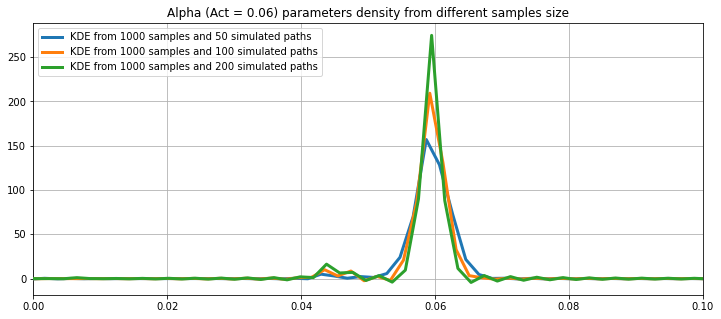

In [14]:
kde1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 2].values)
kde1000.fit()
kde4000 = sm.nonparametric.KDEUnivariate(sim1000_half.iloc[:, 1].values)
kde4000.fit()
kde8000 = sm.nonparametric.KDEUnivariate(sim2000.iloc[:, 1].values)
kde8000.fit()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde4000.support, kde4000.density, lw = 3, label = 'KDE from 1000 samples and 50 simulated paths', zorder = 10)
ax.plot(kde1000.support, kde1000.density, lw = 3, label = 'KDE from 1000 samples and 100 simulated paths', zorder = 10)
ax.plot(kde8000.support, kde8000.density, lw = 3, label = 'KDE from 1000 samples and 200 simulated paths', zorder = 10)
plt.title('Alpha (Act = 0.06) parameters density from different samples size')
ax.set_xlim((0.0, 0.1))
ax.legend(loc = 'best')
ax.grid(True, zorder = -5)

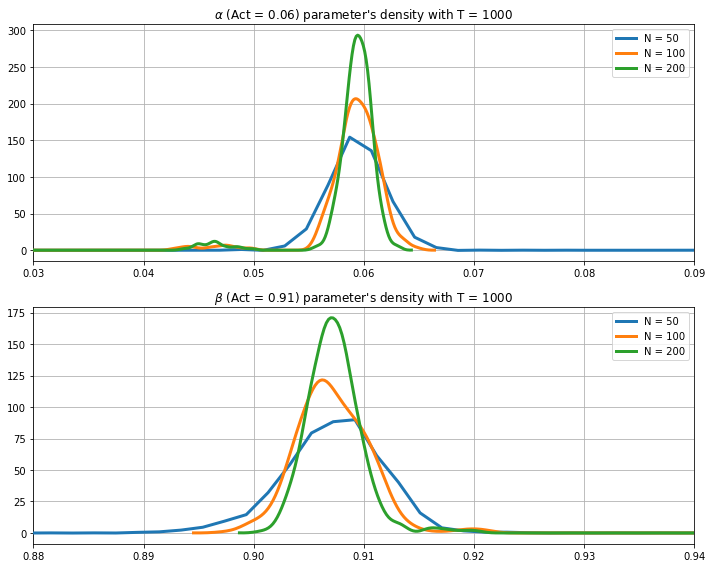

In [10]:
alpha1000_h = sm.nonparametric.KDEUnivariate(sim1000_half.iloc[:, 2].values)
alpha1000_h.fit()
alpha1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 2].values)
alpha1000.fit()
alpha1000_d = sm.nonparametric.KDEUnivariate(sim1000_double.iloc[:, 2].values)
alpha1000_d.fit()

beta1000_h = sm.nonparametric.KDEUnivariate(sim1000_half.iloc[:, 3].values)
beta1000_h.fit()
beta1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 3].values)
beta1000.fit()
beta1000_d = sm.nonparametric.KDEUnivariate(sim1000_double.iloc[:, 3].values)
beta1000_d.fit()

fig , ax = plt.subplots(2, 1, figsize=(10, 8), tight_layout=True)

ax[0].plot(alpha1000_h.support, alpha1000_h.density, lw = 3, label = 'N = 50', zorder = 10)
ax[0].plot(alpha1000.support, alpha1000.density, lw = 3, label = 'N = 100', zorder = 10)
ax[0].plot(alpha1000_d.support, alpha1000_d.density, lw = 3, label = 'N = 200', zorder = 10)
ax[0].set_title(r'$\alpha$'+" (Act = 0.06) parameter's density with T = 1000")
ax[0].grid(True, zorder = -5)
ax[0].set_xlim((0.03, 0.09))
ax[0].legend(loc = 'best')

ax[1].plot(beta1000_h.support, beta1000_h.density, lw = 3, label = 'N = 50', zorder = 10)
ax[1].plot(beta1000.support, beta1000.density, lw = 3, label = 'N = 100', zorder = 10)
ax[1].plot(beta1000_d.support, beta1000_d.density, lw = 3, label = 'N = 200', zorder = 10)
ax[1].set_title(r'$\beta$'+" (Act = 0.91) parameter's density with T = 1000")
ax[1].grid(True, zorder = -5)
ax[1].set_xlim((0.88, 0.94))
ax[1].legend(loc = 'best')

plt.savefig('C:/Users/peter/Desktop/volatility-forecasting/results/panelgarch_sim.png')
plt.show()